# Assignment 04


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import geopandas as gpd

In [3]:
datasets_dir = Path('../../../datasets')
# ls ../../

In [4]:
datasets_dir

WindowsPath('../../../datasets')

In [5]:
moscow_gdb_path = datasets_dir / 'moscow' / 'moscow_vectors' / 'Moscow.gdb'
print(moscow_gdb_path)
print(type(moscow_gdb_path))

..\..\..\datasets\moscow\moscow_vectors\Moscow.gdb
<class 'pathlib.WindowsPath'>


In [6]:
import fiona
moscow_gdb = str(moscow_gdb_path)

fiona.listlayers(moscow_gdb)

['Moscow_Zoning',
 'Centerlines',
 'Moscow_Parks',
 'Moscow_City_Limit',
 'Parcels']

In [7]:
parcels = gpd.read_file(moscow_gdb, layer='Parcels')
roads = gpd.read_file(moscow_gdb, layer='Centerlines')
zoning = gpd.read_file(moscow_gdb, layer='Moscow_Zoning')
city_limits = gpd.read_file(moscow_gdb, layer='Moscow_City_Limit')
parks = gpd.read_file(moscow_gdb, layer='Moscow_Parks')


In [7]:
parcels.columns

Index(['LABEL', 'PM_PAR_14', 'PM_MAIL_NM', 'PM_MAIL_A1', 'PM_MAIL_A2',
       'PM_MAIL_CT', 'PM_MAIL_ST', 'PM_MAIL_ZP', 'PM_PROP_AD', 'PM_DEEDCDT',
       'PM_DEEDRF1', 'PM_DEEDRF2', 'PM_DEEDRF3', 'PM_DEEDRF4', 'PM_DEEDRF5',
       'PM_TAX_AMT', 'PM_PV_AREA', 'PM_PV_NBHD', 'PM_PV_ACRE', 'PM_TOT_VAL',
       'PM_IMP_VAL', 'PM_LND_VAL', 'PM_EX_VAL', 'PM_NET_VAL', 'PM_CATS',
       'LG_LINE_1', 'LG_LINE_2', 'LG_LINE_3', 'LG_LINE_4', 'LG_LINE_5',
       'LG_LINE_6', 'PM_PARC_CD', 'GlobalID', 'Shape_Length', 'Shape_Area',
       'geometry'],
      dtype='object')

In [24]:
parcels

,LABEL,PM_PAR_14,PM_MAIL_NM,PM_MAIL_A1,PM_MAIL_A2,PM_MAIL_CT,PM_MAIL_ST,PM_MAIL_ZP,PM_PROP_AD,PM_DEEDCDT,...,LG_LINE_3,LG_LINE_4,LG_LINE_5,LG_LINE_6,PM_PARC_CD,GlobalID,Shape_Length,Shape_Area,geometry,Dwntn_dist
0,3725,RP39N05W203725,TATKINMAH LLC,709 E F ST,,MOSCOW,ID,83843.0,,20120925.0,...,,,,,,{675E76EB-B256-413D-8A70-F5AA303470C6},8233.556159,1.269041e+06,"MULTIPOLYGON (((2310895.129 1842403.524, 23110...",6469.785647
1,004J,RP39N05W20004J,LARSON-FOUNTAIN SKY RANCH LLC,709 E F ST,,MOSCOW,ID,83843.0,,20120925.0,...,,,,,WH,{313D5239-DF58-4258-A360-D61913D27224},1125.939702,2.429704e+04,"MULTIPOLYGON (((2311059.420 1842229.329, 23110...",6765.448761
2,014A,RPM0496000014A,"REGAN, MAUREEN M TAYLOR",1810 LORIEN LN,,MOSCOW,ID,83843.0,1810 LORIEN,0.0,...,INDIAN HILLS 6TH ADD,BLK 2 LOT 2,,,,{5F7EE3E4-836A-4402-905D-5CC5BF65658A},573.162810,1.652831e+04,"MULTIPOLYGON (((2313927.891 1843762.528, 23140...",6000.304578
3,0RRD,RPM03400010RRD,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN,STE 1500,HOUSTON,TX,77024.0,328 N MAIN,20190815.0,...,TAX #1912 OF RR LOT & LOT A,,,,LD,{49B94C50-6895-4EB5-8934-98D9F5C77F7D},323.999960,4.624991e+03,"MULTIPOLYGON (((2310936.696 1850758.583, 23109...",1757.771345
4,0RRA,RPM03400010RRA,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN,STE 1500,HOUSTON,TX,77024.0,340 N MAIN,20190815.0,...,,,,,CC,{5EFD3778-A96A-4346-AC9B-A82DC91728BA},491.400684,1.440471e+04,"MULTIPOLYGON (((2310938.447 1850916.273, 23110...",1794.771252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,001A,,,,,,,0.0,,0.0,...,,,,,,{DDB9C6E2-6E3D-4370-B643-0C722869EC44},695.039466,2.551610e+04,"MULTIPOLYGON (((2309810.585 1844883.291, 23097...",4147.105067
7390,0030,,,,,,,0.0,,0.0,...,,,,,,{37E0E4F2-77E7-4903-92F8-3E9487209E21},92.921933,1.012760e+00,"MULTIPOLYGON (((2309630.922 1844876.652, 23096...",4300.483728
7391,00A0,,,,,,,0.0,,0.0,...,,,,,,{D203C489-A119-45FD-962A-6BDADB28E531},680.544153,7.253377e+03,"MULTIPOLYGON (((2309722.005 1844975.767, 23097...",4195.665303
7392,0040,,,,,,,0.0,,0.0,...,,,,,,{6430BCBC-C88D-4FBE-8C77-CC244F5EF331},140.856588,9.707514e+02,"MULTIPOLYGON (((2309711.261 1844923.808, 23096...",4225.741560


### Shapely geometries
Behind the scenes, geopandas is reading in vector data, storing the attribute tables as `pandas` dataframes,
and storing the vector geometry as `shapely` geometries.


### Reading:
To become more familiar with vector operations in geopandas/shapely, 
read this introduction to shapely geometries carefully, 
and reproduce/experiment with the code in this reading from within a blank notebook:
https://towardsdatascience.com/geospatial-adventures-step-1-shapely-e911e4f86361

Read this page for a more comprehensive description of `shapely` geometries: 
https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html

Scroll through the `shapely` user manual (https://shapely.readthedocs.io/en/stable/manual.html), 
reviewing the different functions that shapely includes.  `geopandas` allows all of these functions to be
executed, [directly through `geopandas`, without explicit call to `shapely`](https://geopandas.org/docs/user_guide/geometric_manipulations.html).  `shapely` is just running
quietly under the hood.  Pay specific attention to the "Spatial Analysis Methods" of the manual.

In [8]:
from shapely.geometry import LineString , MultiPolygon, Polygon, box
line = LineString([(0, 0), (1, 1), (2, 0)])
print('Line area =', line.area)
print('Line length =', line.length)

Line area = 0.0
Line length = 2.8284271247461903


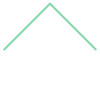

In [9]:
line

In [10]:
type(line)

shapely.geometry.linestring.LineString

In [11]:
print( list(line.coords) )
print( line.coords[2] )

[(0.0, 0.0), (1.0, 1.0), (2.0, 0.0)]
(2.0, 0.0)


<div class="alert alert-block alert-warning">

## 1. Shapely geometries
What `shapely` geometry are each of the parcels in the Moscow parcels layer? What `shapely` geometry are their centroids?
    
Find the Kenworthy Theater within the parcels database (hint: the name field for its mailing address, 
    PM_MAIL_NM, is "KENWORTHY PERFORMING ARTS CTR").
What are the coordinates for the corners of its parcel?    
</div>


In [30]:
parcels.geom_type
parcels.centroid

print(parcels.geom_type , parcels.centroid)



0       MultiPolygon
1       MultiPolygon
2       MultiPolygon
3       MultiPolygon
4       MultiPolygon
            ...     
7389    MultiPolygon
7390    MultiPolygon
7391    MultiPolygon
7392    MultiPolygon
7393    MultiPolygon
Length: 7394, dtype: object 0       POINT (2312316.563 1841855.854)
1       POINT (2310889.377 1842183.675)
2       POINT (2314032.262 1843722.904)
3       POINT (2310999.398 1850776.387)
4       POINT (2310997.470 1850854.715)
                     ...               
7389    POINT (2309827.633 1844939.828)
7390    POINT (2309631.082 1844892.130)
7391    POINT (2309678.033 1844935.229)
7392    POINT (2309702.081 1844949.559)
7393    POINT (2315761.545 1843658.201)
Length: 7394, dtype: geometry


In [42]:
parcels.plot

In [9]:
ken = parcels.loc[parcels['PM_MAIL_NM'] == 'KENWORTHY PERFORMING ARTS CTR']
ken

,LABEL,PM_PAR_14,PM_MAIL_NM,PM_MAIL_A1,PM_MAIL_A2,PM_MAIL_CT,PM_MAIL_ST,PM_MAIL_ZP,PM_PROP_AD,PM_DEEDCDT,...,LG_LINE_2,LG_LINE_3,LG_LINE_4,LG_LINE_5,LG_LINE_6,PM_PARC_CD,GlobalID,Shape_Length,Shape_Area,geometry
1359,002B,RPM0001005002B,KENWORTHY PERFORMING ARTS CTR,508 S MAIN,,MOSCOW,ID,83843.0,508 S MAIN,20010202.0,...,"BLK 5 LOT 2, N 1/2 OF LOT 3",EXEMPT,,,,C,{A4FB5B11-A87D-453A-ABD6-8BC607A17A20},369.999919,7499.997375,"MULTIPOLYGON (((2311036.946 1848531.880, 23110..."


In [96]:
ken.bounds

,minx,miny,maxx,maxy
1359,2.310911e+06,1.848472e+06,2.311037e+06,1.848533e+06


POLYGON ((2311037 1848472, 2311037 1848533, 2310911 1848533, 2310911 1848472, 2311037 1848472))


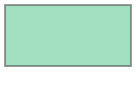

In [104]:
x1 = 2.310911e+06
y1 = 1.848472e+06
x2 = 2.311037e+06
y2 = 1.848533e+06

#test = box(minx=x1, miny=y1, maxx=x2, maxy=y2)
#print(test)
#test

FACILITYID                                               PR-E17-G
NAME                                                Ghormley Park
SUBTYPEFIELD                                                    0
FEATURECODE                                                      
FULLADDR                                              504 Home St
OPERDAYS                                                         
OPERHOURS                                                        
PARKAREA                                                     7.34
PARKURL         https://www.ci.moscow.id.us/parks-rec/parks/Pa...
NUMPARKING                                                    0.0
RESTROOM                                                      Yes
ADACOMPLY                                                        
CAMPING                                                        No
SWIMMING                                                       No
HIKING                                                         No
FISHING   

<AxesSubplot:>

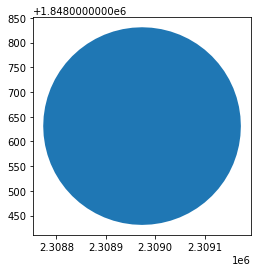

In [10]:
i = 2 # Look at one park, for example
print(parks.iloc[i])

buffer_radius = 200 # What are the units for this?

buffered_park = parks.iloc[i:i+1].buffer(buffer_radius) # Careful!  I'm not sure why this is, but geopandas requires a slice here, not a single index
    #If you use just one index, it seems to remove all the geopandas properties of the data
buffered_park.plot()



<div class="alert alert-block alert-warning">

## 2. Identifying Moscow residents underserved by city parks.
You're an urban planner consulting with the City of Moscow.  The city is interested in increasing the number of parks
    within the city, and better designing those parks to meet the needs of those who are currently underserved
    by the city's existing parks.  The city wants to begin the planning process by reaching out to these currently
    underserved residents, but first the city needs to know who they are.
    
The city asks you to produce a list of all resident addresses within the city limits whose property is at least 1000 feet
    from a current park.
    
To properly address the letters and questionaires that the city will be sending out, the city would like this list
    of residents as a csv file, with each property address on a separate line (property addresses are represented within
    the parcels database by the field name "PM_PROP_AD").  Produce this file and a map of the underserved parcels.
    


</div>

In [11]:
%matplotlib widget

fig, ax = plt.subplots()
parks.buffer(buffer_radius).plot(ax=ax, color='g')
# city_limits.plot(ax=ax, color=None, edgecolor='r')
roads.plot(ax=ax)

ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(1837691.7277759165, 1858582.946164012)

In [18]:
roads

,CENTERLINEID,FROMLEFT,TOLEFT,FROMRIGHT,TORIGHT,FULLNAME,FEDROUTE,FEDRTETYPE,AFEDRTE,AFEDRTETYPE,...,SLOPE,OCI2017,OCI2014,GlobalID,FACILITYID,OCI2019,OCI2020,ADTID,SHAPE_Length,geometry
0,02600,0.0,0.0,0.0,0.0,MAIN ST,None,Other,None,None,...,NaN,58.92,71.66,{E10997BF-346F-493B-9078-ABF3BA07D894},STREET-02600,96.08,96.08,F19-05,87.664841,"MULTILINESTRING ((2310851.729 1847250.622, 231..."
1,01430,0.0,0.0,0.0,0.0,FIRST ST,None,Other,None,None,...,NaN,90.93,98.96,{F2D06156-E244-4542-A0A7-9F47285F09AF},STREET-01430,86.04,86.04,G16-05,349.983212,"MULTILINESTRING ((2310883.550 1849572.726, 231..."
2,02670,102.0,114.0,105.0,205.0,MAIN ST,None,Other,None,None,...,NaN,71.70,100.00,{BF94EEC2-9DBF-42FD-8BA0-31C170DEC8CB},STREET-02670,80.02,80.02,F17-12,230.721479,"MULTILINESTRING ((2310883.464 1849564.375, 231..."
3,02660,204.0,218.0,205.0,221.0,MAIN ST,None,Other,None,None,...,NaN,71.70,100.00,{E4ADA45C-08D8-4C70-B30F-46E1097647A3},STREET-02660,80.02,80.02,F17-06,239.999980,"MULTILINESTRING ((2310880.869 1849333.668, 231..."
4,02650,302.0,318.0,301.0,307.0,MAIN ST,None,Other,None,None,...,NaN,91.97,100.00,{D3CE1840-EC8C-4124-AAEF-4A67AB2B5415},STREET-02650,95.17,95.17,F17-07,240.667684,"MULTILINESTRING ((2310878.196 1849093.683, 231..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,00301,1600.0,1756.0,1601.0,1751.0,THIRD ST,None,Other,None,None,...,5.0,NaN,NaN,{CE44A217-E6DA-4168-A8A9-C28AD394A399},STREET-00301,NaN,NaN,None,756.596825,"MULTILINESTRING ((2316177.219 1849043.781, 231..."
2214,13760,NaN,NaN,NaN,NaN,SOUTHVIEW AVE,None,None,None,None,...,10.0,NaN,NaN,{588D3E9B-7CBE-48D5-94BF-0DB57D0E0442},STREET-13760,NaN,NaN,None,706.800143,"MULTILINESTRING ((2312049.540 1843770.847, 231..."
2215,13765,NaN,NaN,NaN,NaN,SUNNY CT,None,None,None,None,...,7.0,NaN,NaN,{2F896E18-E40F-4BD6-81D2-5DDD91482100},STREET-13765,NaN,NaN,None,173.316937,"MULTILINESTRING ((2312699.813 1843557.137, 231..."
2216,13770,NaN,NaN,NaN,NaN,SOUTHVIEW AVE,None,None,None,None,...,10.0,NaN,NaN,{4BAB6FC8-B24E-49A0-B852-9AF25FD43BF2},STREET-13770,NaN,NaN,None,221.456644,"MULTILINESTRING ((2312699.813 1843557.137, 231..."


In [105]:
zoning.columns

Index(['LANDUSECODE', 'LANDUSEDESC', 'BASEELEV', 'HEIGHT', 'LASTUPDATE',
       'LASTEDITOR', 'SUBTYPECODE', 'SUBTYPEDESC', 'PARCELID', 'ADDRESS',
       'LOCDESC', 'GlobalID', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [12]:
zoning['LANDUSEDESC'].unique()

array(['Auto-Urban Residential', 'University',
       'Parks, Recreation, and Open Space',
       'Auto-Urban Residential, Medium Density', 'Urban Commercial',
       'Urban Residential, Medium Density', 'Urban Residential',
       'Suburban Residential', 'Public and Semi-Public',
       'Auto-Urban Commercial', 'Vacant', 'Auto-Urban Industrial',
       'Agricultural', 'Research/Technology Park', '',
       'Suburban Commercial'], dtype=object)

In [13]:
zoning['LANDUSECODE'].unique()

array(['111', '750', '800', '109', '250', '115', '110', '120', '700',
       '200', '11', '400', '900', '999', '0', '150', None], dtype=object)

In [14]:
# We can measure the distance between any parcel and a point near the center of downtown Moscow
from shapely.geometry import Point
parcels['Dwntn_dist'] = parcels.distance(Point(2.311e6, 1.849e6))

#### Visualizing the data
I think each of the plots below is interesting.  Try commenting and uncommenting each one

In [16]:
%matplotlib widget
fig, ax = plt.subplots( figsize=(8,8) )

# These are a few of the interesting plots to look at.
# parcels.plot(column='Dwntn_dist', ax=ax, legend=True, vmax=5280);
#zoning.plot(column='LANDUSEDESC', ax=ax, legend=True, cmap='tab20')
#parcels.plot(column= 'SaleYear', ax=ax, legend=True, vmin=1990)

ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

roads.plot(ax=ax, color='gray')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

KeyError: 'SaleYear'

### Property sales over time
Similar to the assignment from last week, we can look at the property sales as a function of time.

In [ ]:
import pandas as pd
print( parcels['PM_DEEDCDT'].astype(str)[:4] )

parcels['SaleDate'] = pd.to_datetime(
    parcels['PM_DEEDCDT'], 
    errors='coerce', 
    format='%Y%m%d')


In [ ]:
parcels['SaleDate']

In [ ]:
dates = parcels['PM_DEEDCDT'].to_numpy() # Pull out all the sale dates (initially floats)
yr = np.full( dates.shape, np.nan ) # initialize a variable full of nans

for i in range(len(dates)): 
    if dates[i] > 0:
        yr[i] = int( str(dates[i])[:4] )
    else:
        yr[i] = np.nan

parcels['SaleYear'] = yr # Create a new column for the parcels data frame representing sale year


In [ ]:
bin_size = np.timedelta64(365, 'D')/12 # days
fig, ax = plt.subplots()
ax.hist(parcels['SaleDate'], bins=np.arange(np.datetime64('1990-01-01'), 
                                            np.datetime64('2022-01-01'), 
                                            bin_size ) )
ylabel_text = 'Number of property sales in Moscow\nper ' + str(bin_size.astype(int)) + ' days'
ax.set_ylabel(ylabel_text)
ax.set_xlim(np.datetime64('2000-01-01'), np.datetime64('2022-01-01') );
# ax.set_xlim(np.datetime64('2010-12-15'), np.datetime64('2011-01-01') )

# Note that the sales at the end of 2010 are anomalous, and are all recorded on the same day.
# That's suspicious and Tim thinks that it must be some change in accounting or record keeping.

<div class="alert alert-block alert-warning">

## 3. Investing in downtown property
You are the GIS consultant for a property investment company that specializes in
downtown and higher-density properties.  Your company is considering Moscow real estate.
You've heard about the boom in sales within the city, and your company would like to know how competitive
property purchasing will be, or if they will be able to drive a hard bargin.

Has the downtown property market heated up as much as within the city as a whole?
Compare sale rates within two of the zoned downtown regions with those of the city as a whole.
    
Is there anything else in these data that you would like to share with your colleagues
    that could help advise them as you consider this investment?
</div>

<div class="alert alert-block alert-warning">

## 4. Find, plot, work with data of your own
Find a spatial, vector dataset of your choosing (by googling, from another class, 
    or from a research project of yours). This could be climate data, geologic units,
    census data, ecological units, demographic data, etc. Download or copy this dataset
    into the current directory, plot it, and use geopandas to draw on the attributes 
    of that data (even just lengths, areas, etc) and tell me something about that data.
</div>